cars 데이터셋을 이용하시요.
(문제에 해당하는 함수를 
직접 사용하지 말것)
1. 도수분포표를 그리고 시각화 하시요.
2. 대표값 3개를 구하시요
(평균,중앙값,대표값)
3. 분산, 표준편차를 구하시요.
4. 공분산을 구하시요
5. cars데이터를 정규화 하시요.
6. 상관계수를 구하고 히트맵을 그리시요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data1/cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 1.도수분포표를 그리고 시각화 하시요.

### 도수분포표 준비

# speed

In [3]:
freq, r = np.histogram( df['speed'], bins=10, range=(0,100))
print(freq)
print(r)

[ 6 32 12  0  0  0  0  0  0  0]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [4]:
# speed_class = [f'{i}~{i+10}' for i in range(0, 100,10)]
# speed_df = pd.DataFrame({'빈도':freq},
#                             index=pd.Index(speed_class,
#                                            name='class'))
# speed_df

### speed 의 경우 0~ 30까지의 값만 분포하는 것을 확인

In [5]:
freq, r = np.histogram( df['speed'], bins=10, range=(0,30))
print(freq)
print(r)

[ 0  2  3  6 12  8 12  2  5  0]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.]


In [6]:
speed_class2 = [f'{i}~{i+3}' for i in range(0, 30, 3)]
speed_df = pd.DataFrame({'빈도':freq},
                            index=pd.Index(speed_class2,
                                           name='class'))
speed_df

,빈도
class,
0~3,0
3~6,2
6~9,3
9~12,6
12~15,12
15~18,8
18~21,12
21~24,2
24~27,5


In [7]:
# class_value  = [(i+(i+10))//2 for i in range(0, 100, 10)]
# rel_freq = freq / freq.sum()
# cum_rel_freq = np.cumsum( rel_freq)

## 도수분포표 작성

In [8]:
class_value  = [(i+(i+3))//2 for i in range(0, 30, 3)]
rel_freq = freq / freq.sum()
cum_rel_freq = np.cumsum( rel_freq)

In [9]:
speed_df['계급값'] = class_value
speed_df['상대도수'] = rel_freq.round(2)
speed_df['누적상대도수'] = cum_rel_freq.round(2)
speed_df = speed_df[['계급값', '빈도',
                             '상대도수', '누적상대도수']]
speed_df

,계급값,빈도,상대도수,누적상대도수
class,,,,
0~3,1,0,0.00,0.00
3~6,4,2,0.04,0.04
6~9,7,3,0.06,0.10
9~12,10,6,0.12,0.22
12~15,13,12,0.24,0.46
15~18,16,8,0.16,0.62
18~21,19,12,0.24,0.86
21~24,22,2,0.04,0.90
24~27,25,5,0.10,1.00


## 시각화

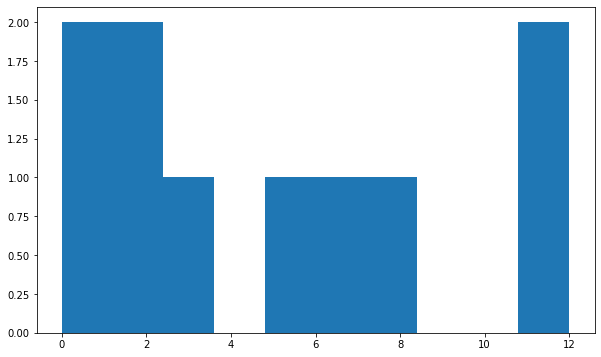

In [10]:
fig = plt.figure( figsize = (10,6))
plt.hist( speed_df['빈도'])
plt.show()

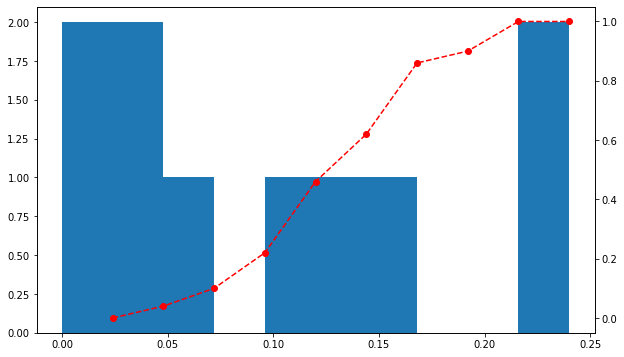

In [11]:
fig = plt.figure( figsize = (10,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

freq, r, _ = ax1.hist( speed_df['상대도수'])
ax2.plot( r[1:] ,speed_df['누적상대도수'], 'ro--')

plt.show()

# dist

In [12]:
max(df['dist'])

120

## dist 의 최대값은 120

In [13]:
d_freq, d_r = np.histogram( df['dist'], bins=10, range=(0,120))
print(d_freq)
print(d_r)

[ 4  7 13  7  7  5  2  4  0  1]
[  0.  12.  24.  36.  48.  60.  72.  84.  96. 108. 120.]


In [14]:
dist_class2 = [f'{i}~{i+12}' for i in range(0, 120, 12)]
dist_df = pd.DataFrame({'빈도':d_freq},
                            index=pd.Index(dist_class2,
                                           name='class'))
dist_df

,빈도
class,
0~12,4
12~24,7
24~36,13
36~48,7
48~60,7
60~72,5
72~84,2
84~96,4
96~108,0


## 도수분포표 작성

In [15]:
dist_class_value  = [(i+(i+12))//2 for i in range(0, 120, 12)]
dist_rel_freq = d_freq / d_freq.sum()
dist_cum_rel_freq = np.cumsum( dist_rel_freq)

In [16]:
dist_df['계급값'] = dist_class_value
dist_df['상대도수'] = dist_rel_freq.round(2)
dist_df['누적상대도수'] = dist_cum_rel_freq.round(2)
dist_df = dist_df[['계급값', '빈도',
                             '상대도수', '누적상대도수']]
dist_df

,계급값,빈도,상대도수,누적상대도수
class,,,,
0~12,6,4,0.08,0.08
12~24,18,7,0.14,0.22
24~36,30,13,0.26,0.48
36~48,42,7,0.14,0.62
48~60,54,7,0.14,0.76
60~72,66,5,0.10,0.86
72~84,78,2,0.04,0.90
84~96,90,4,0.08,0.98
96~108,102,0,0.00,0.98


## 시각화

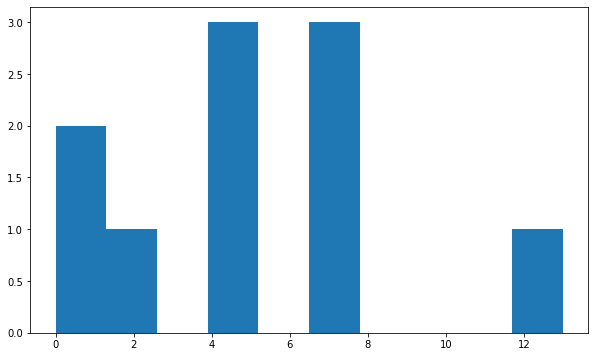

In [17]:
fig = plt.figure( figsize = (10,6))
plt.hist( dist_df['빈도'])
plt.show()

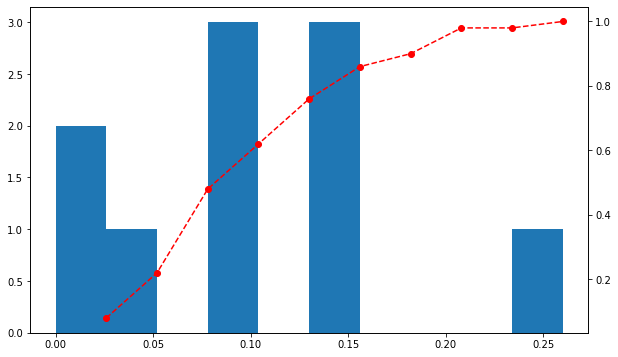

In [18]:
fig = plt.figure( figsize = (10,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

freq, r, _ = ax1.hist( dist_df['상대도수'])
ax2.plot( r[1:] ,dist_df['누적상대도수'], 'ro--')

plt.show()

# 2. 대표값 3개를 구하시요 (평균,중앙값,대표값)

## 평균

## Speed

In [19]:
speed = df['speed'].values

In [20]:
print(speed.sum() / len(speed))
print(speed.mean())  # 확인용

15.4
15.4


## dist

In [21]:
dist = df['dist'].values

In [22]:
print(dist.sum() / len(dist))
print(dist.mean())  # 확인용

42.98
42.98


## 중앙값

## Speed

In [23]:
sorted_speed = np.sort(speed)
sorted_speed

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

In [24]:
n = len(sorted_speed)
if n % 2 == 0:
    m0 = sorted_speed[n//2 - 1]
    m1 = sorted_speed[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_speed[ (n+1)//2 - 1 ]

print(median)
print(np.median( speed))# 확인용


15.0
15.0


## dist

In [25]:
sorted_dist = np.sort(dist)
sorted_dist

array([  2,   4,  10,  10,  14,  16,  17,  18,  20,  20,  22,  24,  26,
        26,  26,  26,  28,  28,  32,  32,  32,  34,  34,  34,  36,  36,
        40,  40,  42,  46,  46,  48,  50,  52,  54,  54,  56,  56,  60,
        64,  66,  68,  70,  76,  80,  84,  85,  92,  93, 120], dtype=int64)

In [26]:
n = len(sorted_dist)
if n % 2 == 0:
    m0 = sorted_dist[n//2 - 1]
    m1 = sorted_dist[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_dist[ (n+1)//2 - 1 ]

print(median)
print(np.median( dist))# 확인용


36.0
36.0


## 대표값 

In [27]:
from scipy.stats import mode

## speed

In [28]:
np.unique(speed, return_counts =True)
dt, c = np.unique(speed, return_counts =True)
for a,b in zip( dt,c):
    print(a,b)

4 2
7 2
8 1
9 1
10 3
11 2
12 4
13 4
14 4
15 3
16 2
17 3
18 4
19 3
20 5
22 1
23 1
24 4
25 1


In [29]:
mode(speed) ## 확인용

ModeResult(mode=array([20], dtype=int64), count=array([5]))

## dist

In [30]:
np.unique(dist, return_counts =True)
dt, c = np.unique(dist, return_counts =True)
for a,b in zip( dt,c):
    print(a,b)

2 1
4 1
10 2
14 1
16 1
17 1
18 1
20 2
22 1
24 1
26 4
28 2
32 3
34 3
36 2
40 2
42 1
46 2
48 1
50 1
52 1
54 2
56 2
60 1
64 1
66 1
68 1
70 1
76 1
80 1
84 1
85 1
92 1
93 1
120 1


In [31]:
# print(np.bincount(dist))
a =np.bincount(dist)==max(np.bincount(dist))
b=list()
for i in a:
    b.append(i)

print(b)
# dist[b]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


### 다른방식으로 해보려 했으나 인덱스로만 표현이 되고 잘 안풀림

# 3. 분산, 표준편차를 구하시요.


## speed

In [32]:
# 분산, 표준편차
speed_d_squared = (df['speed'].values - df['speed'].values.mean())**2 
print('speed 분산 :', speed_d_squared.sum()/len(speed_d_squared))
print('speed 표준편차 :', np.sqrt(speed_d_squared.sum()/len(speed_d_squared)))

speed 분산 : 27.4
speed 표준편차 : 5.2345009313209605


## dist

In [33]:
# 분산, 표준편차

dist_d_squared = (df['dist'].values - df['dist'].values.mean())**2 
print('dist 분산 :', dist_d_squared.sum()/len(dist_d_squared))
print('dist 표준편차 :', np.sqrt(dist_d_squared.sum()/len(dist_d_squared)))

dist 분산 : 650.7796000000001
dist 표준편차 : 25.510382200194496


# 4.공분산을 구하시오 

In [34]:
speed_d = df['speed'].values - df['speed'].values.mean()
dist_d = df['dist'].values - df['dist'].values.mean()

multiply_d = speed_d * dist_d

print('speed와 dist의 공분산 :', multiply_d.sum()/len(multiply_d))

# 함수를 쓰면 아래와 같다!
# np.cov(df['speed'].values, df['dist'].values, ddof=0)

speed와 dist의 공분산 : 107.748


# 5. cars데이터를 정규화 하시요.

## speed

In [35]:
# speed 정규화

speed_mean = df['speed'].values.sum() / len(df['speed'].values)

speed_d_squared = (df['speed'].values - df['speed'].values.mean())**2 
speed_std = np.sqrt(speed_d_squared.sum()/len(speed_d_squared))

(df['speed'].values - speed_mean) / speed_std

array([-2.17785805, -2.17785805, -1.60473751, -1.60473751, -1.41369733,
       -1.22265715, -1.03161697, -1.03161697, -1.03161697, -0.84057679,
       -0.84057679, -0.64953661, -0.64953661, -0.64953661, -0.64953661,
       -0.45849643, -0.45849643, -0.45849643, -0.45849643, -0.26745625,
       -0.26745625, -0.26745625, -0.26745625, -0.07641607, -0.07641607,
       -0.07641607,  0.11462411,  0.11462411,  0.30566429,  0.30566429,
        0.30566429,  0.49670447,  0.49670447,  0.49670447,  0.49670447,
        0.68774465,  0.68774465,  0.68774465,  0.87878483,  0.87878483,
        0.87878483,  0.87878483,  0.87878483,  1.26086519,  1.45190537,
        1.64294555,  1.64294555,  1.64294555,  1.64294555,  1.83398573])

In [36]:
# 평균이 0, 표준편차가 1임을 확인!

n_speed = (df['speed'].values - speed_mean) / speed_std
print('평균 :', n_speed.mean())
print('표준편차 :', n_speed.std())

평균 : -7.993605777301127e-17
표준편차 : 1.0


## dist

In [37]:
# dist 정규화

dist_mean = df['dist'].values.sum() / len(df['dist'].values)

dist_d_squared = (df['dist'].values - df['dist'].values.mean())**2 
dist_std = np.sqrt(dist_d_squared.sum()/len(dist_d_squared))

(df['dist'].values - dist_mean) / dist_std

array([-1.60640478, -1.29280697, -1.52800533, -0.82241026, -1.05760862,
       -1.29280697, -0.97920916, -0.66561135, -0.35201354, -1.01840889,
       -0.5872119 , -1.13600807, -0.90080971, -0.74401081, -0.5872119 ,
       -0.66561135, -0.35201354, -0.35201354,  0.11838317, -0.66561135,
       -0.27361409,  0.66717934,  1.45117387, -0.90080971, -0.66561135,
        0.43198098, -0.43041299, -0.11681518, -0.43041299, -0.11681518,
        0.27518208, -0.03841573,  0.51038044,  1.29437496,  1.60797277,
       -0.27361409,  0.11838317,  0.98077715, -0.43041299,  0.19678263,
        0.35358153,  0.51038044,  0.82397825,  0.9023777 ,  0.43198098,
        1.0591766 ,  1.92157058,  1.96077031,  3.01916292,  1.6471725 ])

In [38]:
# 평균이 0, 표준편차가 1임을 확인!

n_dist = (df['dist'].values - dist_mean) / dist_std
print('평균 :', n_dist.mean())
print('표준편차 :', n_dist.std())

평균 : 1.1546319456101628e-16
표준편차 : 0.9999999999999998


# 6. 상관계수를 구하고 히트맵을 그리시오

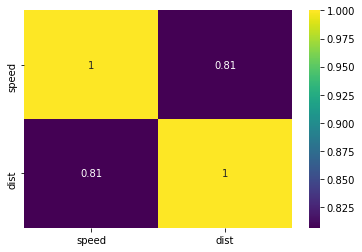

In [39]:
speed = df['speed']
dist  = df['dist']

# 공분산 구하는 함수

def covariance(X, Y): 
    ax, ay = X.mean(), Y.mean()
    data = [round((x-ax)*(y-ay),2) for x, y in zip(X, Y)]
    # print('data:',data)
    return sum(data) / len(X)

# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# speed, speed
cor_car1 = covariance(speed, speed) / (np.std(speed) * np.std(speed))
cor_car1

# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# dist, dist
cor_car2 = covariance(dist, dist) / (np.std(dist) * np.std(dist))
cor_car2

# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# speed, dist
cor_car3 = covariance(speed, dist) / (np.std(speed) * np.std(dist))
cor_car3

# 데이터프레임으로 만들기
car_corr = [[cor_car1,cor_car3],
            [cor_car3,cor_car2]]
car_corr_df = pd.DataFrame(car_corr)
car_corr_df 

# 컬럼명, 인덱스명 변경
car_corr_df = car_corr_df.rename({0:'speed',1:'dist'})
car_corr_df = car_corr_df.rename({0:'speed',1:'dist'}, axis=1)
car_corr_df

#### seaborn 이용
import seaborn as sns
sns.heatmap(car_corr_df, cmap='viridis', annot=True)
plt.show()   